Install XGBoost for GPU usage:

In [1]:
# !pip install xgboost
# !pip install xgboost-0.81-py2.py3-none-manylinux1_x86_64.whl

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
# %matplotlib inline    #render figures inline. 

import seaborn as sns

import pandas as pd
import numpy as np
from sklearn.utils import shuffle

import warnings
warnings.filterwarnings("ignore")

np.random.seed(42) 

# Exploratory Data Analysis

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import datetime
now = datetime.datetime.now()
timestamp = now.strftime("%Y-%m-%d")

In [5]:
dir = '/content/drive/MyDrive/Work/Omdena/Ethiopia NLP/project/Ethiopian-languages-DS/'
data_dir = dir + 'data/'
reports_dir = dir + 'reports/' + timestamp + '/'

In [6]:
# dir = '../'
# data_dir = dir + 'data/'
# reports_dir = dir + 'reports/' + timestamp + '/'

In [7]:
import os
if not os.path.exists(reports_dir):
    os.makedirs(reports_dir)

In [8]:
path = data_dir + 'Amharic_corpus_merged_2023-04-16.csv'
data = pd.read_csv(path)

data = shuffle(data)
data.head()

,article,category
57065,\n\n\nማክሰኞ ሰኔ 7 ቀን 2014 ዓ.ም. በሕዝብ ተወካዮች ምክር ቤት...,Politics
9169,አዲስ አበባ ፣ ሚያዚያ 24 ፣ 2012 (ኤፍ ቢ ሲ) ገቢው የኮሮና ቫይረ...,Local News
9807,ጎንደር ላይ በተደረገው የሊጉ የሁለተኛ ሳምንት ጨዋታ ፋሲል ከነማ ከሙጂብ...,Sports
60678,\n\n\nየሕዝብ ተወካዮች ምክር ቤት ‹‹በሕግ ተመራቂ ተማሪዎች የመውጫ ...,Politics
44025,በኢትዮጵያ ፕሪምየር ሊግ 16ኛ ሳምንት ድሬዳዋ ላይ ድሬዳዋ ከተማ ከ ኢት...,Sports


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61915 entries, 57065 to 56422
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   article   61915 non-null  object
 1   category  61915 non-null  object
dtypes: object(2)
memory usage: 1.4+ MB


In [10]:
data.category.value_counts()

Local News            20674
Politics              14481
Sports                10411
Business               9170
International News     6543
Entertainment           635
Others                    1
Name: category, dtype: int64

In [11]:
data.category.unique()

array(['Politics', 'Local News', 'Sports', 'Business',
       'International News', 'Entertainment', 'Others'], dtype=object)

In [12]:
data.isna().sum()

article     0
category    0
dtype: int64

In [13]:
# data = data.dropna(subset=['article'])

In [14]:
data.duplicated().sum()

1065

In [15]:
data[data.duplicated()]

,article,category
26860,,Sports
49119,,Politics
45578,,Sports
19792,,Sports
26812,በደቡባዊ አፍሪካ ግንባር ቀደም ሲሚንቶ አምራች የሆነው ፒፒሲ፤ በደቡብ አ...,Business
...,...,...
10230,የኢትዮጵያ አየር መንገድ የጀመረውን አዲስ በረራ ምክንያት በማድረግ ወደ...,International News
33270,Normal 0 false false false Microsof...,Politics
19115,ጆአኪም ደመር ይባላል። ስዊድናዊ የዶክሜንትሪ ወይም የዘጋቢ ፊልም ሠሪ ነ...,International News
24276,ለ2010 ዓ.ም. የተያዘው 321.8 ቢሊዮን ብር በጀት በአግባቡ ጥቅም ላ...,Business


In [16]:
data = data.drop_duplicates()

In [17]:
data.category.value_counts()

Local News            20530
Politics              14347
Sports                10230
Business               9105
International News     6002
Entertainment           635
Others                    1
Name: category, dtype: int64

# character level normalization

Amharic has characters wich have the same sound that can be interchangably used.

for example letters 'ሃ','ኅ','ኃ','ሐ','ሓ','ኻ','ሀ' have the same sound so we change them to 'ሀ' 

In [18]:
import re
#method to normalize character level missmatch such as ጸሀይ and ፀሐይ
def normalize_char_level_missmatch(input_token):
    rep1=re.sub('[ሃኅኃሐሓኻ]','ሀ',input_token)
    rep2=re.sub('[ሑኁዅ]','ሁ',rep1)
    rep3=re.sub('[ኂሒኺ]','ሂ',rep2)
    rep4=re.sub('[ኌሔዄ]','ሄ',rep3)
    rep5=re.sub('[ሕኅ]','ህ',rep4)
    rep6=re.sub('[ኆሖኾ]','ሆ',rep5)
    rep7=re.sub('[ሠ]','ሰ',rep6)
    rep8=re.sub('[ሡ]','ሱ',rep7)
    rep9=re.sub('[ሢ]','ሲ',rep8)
    rep10=re.sub('[ሣ]','ሳ',rep9)
    rep11=re.sub('[ሤ]','ሴ',rep10)
    rep12=re.sub('[ሥ]','ስ',rep11)
    rep13=re.sub('[ሦ]','ሶ',rep12)
    rep14=re.sub('[ዓኣዐ]','አ',rep13)
    rep15=re.sub('[ዑ]','ኡ',rep14)
    rep16=re.sub('[ዒ]','ኢ',rep15)
    rep17=re.sub('[ዔ]','ኤ',rep16)
    rep18=re.sub('[ዕ]','እ',rep17)
    rep19=re.sub('[ዖ]','ኦ',rep18)
    rep20=re.sub('[ጸ]','ፀ',rep19)
    rep21=re.sub('[ጹ]','ፁ',rep20)
    rep22=re.sub('[ጺ]','ፂ',rep21)
    rep23=re.sub('[ጻ]','ፃ',rep22)
    rep24=re.sub('[ጼ]','ፄ',rep23)
    rep25=re.sub('[ጽ]','ፅ',rep24)
    rep26=re.sub('[ጾ]','ፆ',rep25)
    #Normalizing words with Labialized Amharic characters such as በልቱዋል or  በልቱአል to  በልቷል  
    rep27=re.sub('(ሉ[ዋአ])','ሏ',rep26)
    rep28=re.sub('(ሙ[ዋአ])','ሟ',rep27)
    rep29=re.sub('(ቱ[ዋአ])','ቷ',rep28)
    rep30=re.sub('(ሩ[ዋአ])','ሯ',rep29)
    rep31=re.sub('(ሱ[ዋአ])','ሷ',rep30)
    rep32=re.sub('(ሹ[ዋአ])','ሿ',rep31)
    rep33=re.sub('(ቁ[ዋአ])','ቋ',rep32)
    rep34=re.sub('(ቡ[ዋአ])','ቧ',rep33)
    rep35=re.sub('(ቹ[ዋአ])','ቿ',rep34)
    rep36=re.sub('(ሁ[ዋአ])','ኋ',rep35)
    rep37=re.sub('(ኑ[ዋአ])','ኗ',rep36)
    rep38=re.sub('(ኙ[ዋአ])','ኟ',rep37)
    rep39=re.sub('(ኩ[ዋአ])','ኳ',rep38)
    rep40=re.sub('(ዙ[ዋአ])','ዟ',rep39)
    rep41=re.sub('(ጉ[ዋአ])','ጓ',rep40)
    rep42=re.sub('(ደ[ዋአ])','ዷ',rep41)
    rep43=re.sub('(ጡ[ዋአ])','ጧ',rep42)
    rep44=re.sub('(ጩ[ዋአ])','ጯ',rep43)
    rep45=re.sub('(ጹ[ዋአ])','ጿ',rep44)
    rep46=re.sub('(ፉ[ዋአ])','ፏ',rep45)
    rep47=re.sub('[ቊ]','ቁ',rep46) #ቁ can be written as ቊ
    rep48=re.sub('[ኵ]','ኩ',rep47) #ኩ can be also written as ኵ  
    return rep48


In [19]:
data['article'] = data['article'].str.replace(r'[^\w\s]','')

In [20]:
data['article'] = data['article'].apply(lambda x: normalize_char_level_missmatch(x))

In [21]:
# n_data = data[['article','category']]
# n_data.head()


In [22]:
text,label = data['article'].values , data['category'].values

In [23]:
# n_data.head(5).to_csv('table.csv')

## Model Evaluation

In [24]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score

In [25]:
def print_eval(title, model, X_train, X_test, y_train, y_test):
    from sklearn.metrics import confusion_matrix, classification_report

    print(title)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))

    print("Test_Set")
    print(classification_report(y_test, y_pred)) #, target_names=cat_labels))

    print("Train_Set")
    print(classification_report(y_train, y_pred_train)) #, target_names=cat_labels))
    

# Count Vectorizer

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
matrix = CountVectorizer(analyzer='word',max_features=1000,ngram_range=(1, 3))
X = matrix.fit_transform(text).toarray()
Y = label.copy()
X, Y

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array(['Politics', 'Local News', 'Sports', ..., 'Business', 'Local News',
        'Business'], dtype=object))

In [27]:
# unique_label = list(set(label))
# Y= []
# for i in label:
#     Y.append(unique_label.index(i))

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2, random_state=42)

In [29]:
def store_prec_recall_result(title, score:float):
  d = {"Model":[], "Prec_Recall_score":[]}
  d["Model"].append(title)

  d["Prec_Recall_score"].append(score)

  df = pd.DataFrame(d)

  filename = reports_dir + 'Results' + '.csv'

  import os
  if not os.path.isfile(filename):
    df.to_csv(filename, header=d.keys(), index=False)  
  else:         
    df.to_csv(filename, mode='a', header=False, index=False)

In [30]:
def read_results():
    return pd.read_csv(reports_dir, index=False)

## XGBoost

In [31]:
method_name = 'XGBoost CntVec'

In [32]:
data.category.value_counts()

Local News            20530
Politics              14347
Sports                10230
Business               9105
International News     6002
Entertainment           635
Others                    1
Name: category, dtype: int64

In [33]:
Y

array(['Politics', 'Local News', 'Sports', ..., 'Business', 'Local News',
       'Business'], dtype=object)

In [34]:
np.unique(Y)

array(['Business', 'Entertainment', 'International News', 'Local News',
       'Others', 'Politics', 'Sports'], dtype=object)

In [35]:
d_replace = { "Business": 0,
         "Entertainment": 1,
    "International News": 2,
            "Local News": 3,
              "Politics": 4,
                "Sports": 5,
                "Others": 6 }

Y = pd.Series(Y).map(d_replace).to_numpy(dtype=int)
np.unique(Y_)

NameError: ignored

In [ ]:
# df = data.copy()

# df.category = Y_
# # df.category = df.category.astype(int)
# df.sample(10)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=Y, test_size=0.2, random_state=42)

In [38]:
from xgboost import XGBClassifier

classifier = XGBClassifier(tree_method='gpu_hist', random_state=42)
classifier.fit(X_train,y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.8373048479868529

In [39]:
print_eval(method_name, classifier, X_train, X_test, y_train, y_test)

XGBoost CntVec
[[1426    1   14  204  143    3]
 [   1   91    2   36    1    5]
 [   5    0  930  229   36   12]
 [ 148    4  168 3410  363   24]
 [ 100    0   74  329 2346    3]
 [   1    1    8   60    5 1987]]
Test_Set
              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1791
           1       0.94      0.67      0.78       136
           2       0.78      0.77      0.77      1212
           3       0.80      0.83      0.81      4117
           4       0.81      0.82      0.82      2852
           5       0.98      0.96      0.97      2062

    accuracy                           0.84     12170
   macro avg       0.86      0.81      0.83     12170
weighted avg       0.84      0.84      0.84     12170

Train_Set
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      7314
           1       1.00      0.98      0.99       499
           2       0.85      0.88      0.86      4790
       

We have an overfitting here. The result of test set is lower than train set. Accuracy has 10 percent difference which means overfitting.

In [41]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# scoring = {'accuracy': make_scorer(accuracy_score),
#             'precision-neg': make_scorer(precision_score, average=None, labels=features),
#             'recall-neg': make_scorer(recall_score, average=None, labels = features),
#             'f1-neg': make_scorer(f1_score, average=None, labels = features)}

scoring = "f1"

param_grid = {"n_estimators":[50, 100],
             'max_depth':[3,4], 
             "learning_rate": [0.1, 0.2],
             "subsample":[0.5, 0.8], 
             "colsample_bytree":[0.5,0.7]} 
njobs = 2


xgb_model = XGBClassifier(tree_method='gpu_hist', random_state=42)
xgb_grid = GridSearchCV(xgb_model, param_grid=param_grid, scoring=scoring, refit=False, verbose=2, n_jobs = njobs)
xgb_grid.fit(X_train, y_train)
xgb_grid.best_params_

Fitting 5 folds for each of 32 candidates, totalling 160 fits


{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 50,
 'subsample': 0.5}

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

# features = [feature]
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision': make_scorer(precision_score, average=None) , #labels=features),
            'recall': make_scorer(recall_score, average=None) , #labels = features),
            'f1': make_scorer(f1_score, average=None) #, labels = features)
            }

# scoring = 'f1'

#model with best parameters
model = XGBClassifier(
    colsample_bytree = 0.5,
    learning_rate = 0.1,
    max_depth = 2,
    n_estimators = 50,
    subsample = 0.5
    random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

[20:20:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:24:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:28:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:32:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

test_accuracy        NaN
test_precision-neg   NaN
test_recall-neg      NaN
test_f1-neg          NaN
dtype: float64

[21:02:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:03:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:04:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:05:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

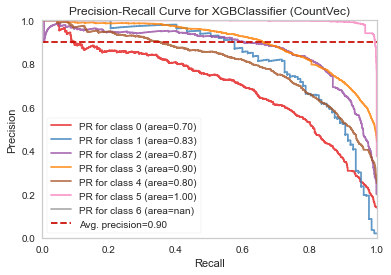

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve

xgb_model = XGBClassifier(
    colsample_bytree = 0.5,
    learning_rate = 0.1,
    max_depth = 2,
    n_estimators = 50,
    subsample = 0.5
    random_state=42)

viz = PrecisionRecallCurve(
    xgb_model,
    title="Precision-Recall Curve for XGBClassifier (CountVec)", 
    classes=classifier.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train,y_train)
avg_score = viz.score(X_test, y_test)
path = reports_dir + method_name + "_prec-recall.png"
viz.show(outpath=path);

In [ ]:
store_prec_recall_result(method_name, score)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

# TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
matrix = TfidfVectorizer(analyzer='word',max_features=1000,ngram_range=(1, 3))
X = matrix.fit_transform(text).toarray()
Y = label.copy()
X, Y

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array(['Politics', 'Local News', 'Local News', ..., 'Local News',
        'Sports', 'Local News'], dtype=object))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2, random_state=42)

## XGBoost

In [ ]:
method_name = 'XGBoost TF-iDF'

In [ ]:
Y

array(['Politics', 'Local News', 'Local News', ..., 'Local News',
       'Sports', 'Local News'], dtype=object)

In [ ]:
np.unique(Y)

array(['Business', 'Entertainment', 'International News', 'Local News',
       'Others', 'Politics', 'Sports'], dtype=object)

In [ ]:
d_replace = { "Business": 0,
         "Entertainment": 1,
    "International News": 2,
            "Local News": 3,
              "Politics": 4,
                "Sports": 5,
                "Others": 6 }

Y_ = pd.Series(Y).map(d_replace).to_numpy(dtype=int)
np.unique(Y_)

array([0, 1, 2, 3, 4, 5, 6])

In [ ]:
# df = data.copy()

# df.category = Y_
# # df.category = df.category.astype(int)
# df.sample(10)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y_     , test_size=0.2, random_state=42)

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier(random_state=42)
classifier.fit(X_train,y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.8239292997960571

In [ ]:
print_eval(method_name, classifier, X_train, X_test, y_train, y_test)

XGBoost TF-iDF
[[ 454    1    8  226  111    2]
 [   2   87    2   36    0    0]
 [  10    1 1052  217   36    7]
 [ 102    8  136 3527  272   27]
 [  73    7   52  397 1346    3]
 [   1    2    3   69    2 2018]]
Test_Set
              precision    recall  f1-score   support

           0       0.71      0.57      0.63       802
           1       0.82      0.69      0.75       127
           2       0.84      0.80      0.82      1323
           3       0.79      0.87      0.83      4072
           4       0.76      0.72      0.74      1878
           5       0.98      0.96      0.97      2095

    accuracy                           0.82     10297
   macro avg       0.82      0.77      0.79     10297
weighted avg       0.82      0.82      0.82     10297

Train_Set
              precision    recall  f1-score   support

           0       0.91      0.83      0.87      3092
           1       1.00      1.00      1.00       508
           2       0.92      0.93      0.92      5220
       

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

features = ['Business']
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-neg': make_scorer(precision_score, average=None, labels=features),
            'recall-neg': make_scorer(recall_score, average=None, labels = features),
            'f1-neg': make_scorer(f1_score, average=None, labels = features)}

model = XGBClassifier(random_state=42)
scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.819429
test_precision-neg    0.000000
test_recall-neg       0.000000
test_f1-neg           0.000000
dtype: float64

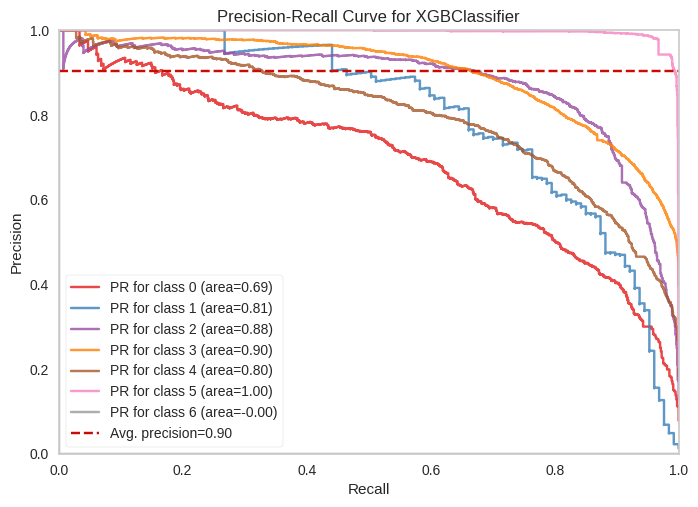

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    XGBClassifier(random_state=42),
    title="Precision-Recall Curve for XGBClassifier (TF-iDF)", 
    classes=classifier.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train,y_train)
viz.score(X_test, y_test)
path = reports_dir + method_name + "_prec-recall.png"
viz.show(outpath=path);

In [ ]:
store_result(method_name, feature, y_test, y_pred, viz)

NameError: ignored

# Models Comparison

In [ ]:
results_df = read_results()
results_df

In [ ]:
def labels(ax):                        
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment


plt.figure(figsize=(7,10))

plt.subplot(311)
results_df = results_df.sort_values(by="Recall_score", ascending=False)
ax=sns.barplot(x="Recall_score", y="Model", data=results_df, palette="Blues_d")
labels(ax)
ax.set_title("Performances for feature:" + feature)

plt.subplot(312)
results_df = results_df.sort_values(by="F1_score", ascending=False)
ax=sns.barplot(x="F1_score", y="Model", data=results_df, palette="Blues_d")
labels(ax)

plt.subplot(313)
results_df = results_df.sort_values(by="Prec_Recall_score", ascending=False)
ax=sns.barplot(x="Prec_Recall_score", y="Model", data=results_df, palette="Blues_d")
labels(ax)
# ax.set_title('subplot 1')


plt.show();